<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mathematical-Equations:" data-toc-modified-id="Mathematical-Equations:-1">Mathematical Equations:</a></span></li><li><span><a href="#API-(sklearn.svm):" data-toc-modified-id="API-(sklearn.svm):-2">API (sklearn.svm):</a></span></li><li><span><a href="#Dataset:" data-toc-modified-id="Dataset:-3">Dataset:</a></span></li><li><span><a href="#Model:" data-toc-modified-id="Model:-4">Model:</a></span></li><li><span><a href="#Evaluation:" data-toc-modified-id="Evaluation:-5">Evaluation:</a></span></li></ul></div>

In [2]:
import string
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets as ds

from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer

import warnings


plt.style.use('seaborn')
np.set_printoptions(precision=3)

warnings.filterwarnings('ignore')
%matplotlib inline


##### Mathematical Equations:

**Equation 5-1: Gaussian RBF**

$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} 
= {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
= \displaystyle e^{\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2}
= \displaystyle e^{\displaystyle -\frac{\left\| \mathbf{x^{(i)}} - \mathbf{x^{(j)}} \right\|^2}{s^2}}
$

$
\displaystyle \phi(\mathbf{x^{(i)}}, \mathbf{x^{(j)}})
= \displaystyle e^{\displaystyle -\frac{\left\| \mathbf{x^{(i)}} - \mathbf{x^{(j)}} \right\|^2}{s^2}}
$

**Equation 5-2: Linear SVM classifier prediction**

$
\hat{y} = \begin{cases}
 0 & \text{if } \mathbf{w}^T \mathbf{x} + b < 0, \\
 1 & \text{if } \mathbf{w}^T \mathbf{x} + b \geq 0
\end{cases}
$

**Loss Function of Hard Margin Perceptron**


\begin{split}
\displaystyle L(\mathbf{w}, b)
&= \begin{cases}
        - \left\{1 - y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right\} \quad & \text{if} \quad y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \lt 0; \quad y^{(i)} \in \{1,-1\}\\
        0 \quad & \text{if} \quad y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 0; \quad y^{(i)} \in \{1,-1\}
    \end{cases} \\
&= max\left\{0, 1 - y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right\}; \quad y^{(i)} \in \{1,-1\}
\end{split}

**Equation 5-3 (Primal): Linear SVM classifier objective**


\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad \frac{{\left\| \mathbf{w} \right\|}^2}{2} + \sum_{i=1}^m max\left\{0, 1 - y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right\} \\
&\text{subject to} \quad y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}

**Equation 5-3 (Primal Lagrangian): Hard margin linear SVM classifier objective**


\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}} \quad \frac{{\left\| \mathbf{w} \right\|}^2}{2} -  \sum_{i=1}^{m} \alpha_i\left[y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) - 1 \right] \\
&\text{subject to} \quad \alpha_i \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}

From Lagrangian Primal (Hard margin linear SVM classifier objective),

\begin{equation} \label{eq:1}
\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}} \quad \frac{{\left\| \mathbf{w} \right\|}^2}{2} -  \sum_{i=1}^{m} \alpha_i\left[y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) - 1 \right] \\
&\text{subject to} \quad \alpha_i \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
\end{equation}

First take derivatives of function in equation -\ref{eq:1},


\begin{equation} \label{eq:2}
\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}, b) 
= \mathbf{w} - \sum\limits_{i=1}^{m}\alpha^{(i)}y^{(i)}\mathbf{x}^{(i)} \\
\end{equation}

\begin{equation}\label{eq:3}
\dfrac{\partial}{\partial b}\mathcal{L}(\mathbf{w}, b) = - \sum\limits_{i=1}^{m}\alpha^{(i)}y^{(i)}
\end{equation}

We get $\mathbf{w}$ by setting equation \ref{eq:2} to zero as follows,
\begin{split}
    & \mathbf{w} - \sum\limits_{i=1}^{m}\alpha^{(i)} y^{(i)}\mathbf{x}^{(i)} = 0 \\
    & \mathbf{w} = \sum_{i=1}^{m} \alpha^{(i)} y^{(i)}\mathbf{x}^{(i)}
\end{split}


We get the following constrain by setting equation \ref{eq:3} to zero,
$$
- \sum\limits_{i=1}^{m}\alpha^{(i)}y^{(i)} = 0 \\
\sum\limits_{i=1}^{m}\alpha^{(i)}y^{(i)} = 0
$$

Now, from equation $\ref{eq:1}$,

\begin{split}
& \frac{{\left\| \mathbf{w} \right\|}^2}{2} -  \sum_{i=1}^{m} \alpha_i\left[y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) - 1 \right] \\
&= \frac{{\left\| \mathbf{w} \right\|}^2}{2} - \sum_{i=1}^{m} \alpha_i y^{(i)} \mathbf{x}^{(i)} \mathbf{w}^T - \sum_{i=1}^{m} \alpha_i y^{(i)} b +  \sum_{i=1}^{m} \alpha_i \\
&= \frac{{\left\| \mathbf{w} \right\|}^2}{2} - \sum_{i=1}^{m} \alpha_i y^{(i)} \mathbf{x}^{(i)} \cdot \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}y^{(i)}\mathbf{x}^{(i)} - 0 \cdot b +  \sum_{i=1}^{m} \alpha_i \\
&= \frac{{\left\| \mathbf{w} \right\|}^2}{2} - {\left\| \mathbf{w} \right\|}^2 +  \sum_{i=1}^{m} \alpha_i
\end{split}

Hence, in Dual form, the optimization objective takes following form.

$$
\begin{split}
&\underset{\mathbf{\alpha}}{\operatorname{minimize}} \quad
\sum\limits_{i=1}^{m}{\alpha^{(i)}} -
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
      \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} \\
&\text{subject to}\quad \sum_{i=1}^m \alpha^{(i)} y^{(i)} = 0 , \quad \alpha^{(i)} \ge 0 \quad \text{for }i = 1, 2, \dots, m
\end{split}
$$


**(Dual): Hard margin linear SVM classifier objective**

$$
\begin{split}
&\underset{\mathbf{\alpha}}{\operatorname{minimize}} \quad
\sum\limits_{i=1}^{m}{\alpha^{(i)}} -
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
      \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} \\
&\text{subject to}\quad \sum_{i=1}^m \alpha^{(i)} y^{(i)} = 0 , \quad \alpha^{(i)} \ge 0 \quad \text{for }i = 1, 2, \dots, m
\end{split}
$$

**Equation 5-7: From the dual solution to the primal solution**

\begin{split}
&\hat{\mathbf{w}} = \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}y^{(i)}\mathbf{x}^{(i)}\\
&\hat{b} = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(y^{(i)} - ({\hat{\mathbf{w}}}^T \mathbf{x}^{(i)})\right)}
\end{split}

**Primal: Soft margin linear SVM classifier objective**

$$
\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}} \quad {\frac{{\left\| \mathbf{w} \right\|}^2}{2} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$$



**Dual: Soft margin linear SVM classifier objective**

$$
\begin{split}
&\underset{\mathbf{\alpha}}{\operatorname{minimize}} \quad
\dfrac{1}{2}\sum\limits_{i=1}^{m}{
  \sum\limits_{j=1}^{m}{
      \alpha^{(i)} \alpha^{(j)} y^{(i)} y^{(j)} {\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)}
  }
} - \sum\limits_{i=1}^{m}{\alpha^{(i)}} \\
&\text{subject to}\quad \sum_{i=1}^m \alpha^{(i)} y^{(i)} = 0 ; \quad 0 \le \alpha^{(i)} \le C \quad \text{for }i = 1, 2, \dots, m
\end{split}
$$

**Equation 5-8: Second-degree polynomial mapping**

$$
\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$$

**Equation 5-9: Kernel trick for a $2^{nd}$-degree polynomial mapping**


\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) & \quad = 
    \begin{pmatrix}
      {a_1}^2 \\
      \sqrt{2} \, a_1 a_2 \\
      {a_2}^2
    \end{pmatrix}^T 
    \begin{pmatrix}
      {b_1}^2 \\
      \sqrt{2} \, b_1 b_2 \\
      {b_2}^2
    \end{pmatrix} = 
    {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
     & \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( 
    \begin{pmatrix}
      a_1 \\
      a_2
    \end{pmatrix}^T 
    \begin{pmatrix}
        b_1 \\
        b_2
    \end{pmatrix} \right)^2 = 
    (\mathbf{a}^T \mathbf{b})^2
\end{split}


**In the text about the kernel trick (page 162):**
[...], then you can replace this dot product of transformed vectors simply by $ ({\mathbf{x}^{(i)}}^T  \mathbf{x}^{(j)})^2 $

**Equation 5-10: Common kernels**

\begin{split}
\text{Linear:}       & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{Polynomial:}   & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{Gaussian RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = e^{{\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}} = e^{\displaystyle - \frac{\left\| \mathbf{a} - \mathbf{b} \right\|^2}{s}}\\
\text{Sigmoid:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}

**Equation 5-11: Making predictions with a kernelized SVM**


\begin{split}
h_{\hat{\mathbf{w}}, \hat{b}} \left(\phi(\mathbf{x}^{(n)})\right) 
& = \,\hat{\mathbf{w}}^T \phi(\mathbf{x}^{(n)}) + \hat{b} 
  = \left(\sum_{i=1}^{m}{\hat{\alpha}}^{(i)}y^{(i)}\phi(\mathbf{x}^{(i)})\right)^T \phi(\mathbf{x}^{(n)}) + \hat{b}\\
& = \, \sum_{i=1}^{m}{\hat{\alpha}}^{(i)}y^{(i)}\left(\phi(\mathbf{x}^{(i)})^T \phi(\mathbf{x}^{(n)})\right)  + \hat{b}\\
 & = \sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\hat{\alpha}}^{(i)}y^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}) + \hat{b}
\end{split}

**Equation 5-12: Computing the bias term using the kernel trick**
\begin{split}
\hat{b} & = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(y^{(i)} - {\hat{\mathbf{w}}}^T \phi(\mathbf{x}^{(i)})\right)} = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(y^{(i)} - {
 \left(\sum_{j=1}^{m}{\hat{\alpha}}^{(j)}y^{(j)}\phi(\mathbf{x}^{(j)})\right)
 }^T \phi(\mathbf{x}^{(i)})\right)}\\
 & = \dfrac{1}{n_s}\sum\limits_{\scriptstyle i=1 \atop {\scriptstyle {\hat{\alpha}}^{(i)} > 0}}^{m}{\left(y^{(i)} -
\sum\limits_{\scriptstyle j=1 \atop {\scriptstyle {\hat{\alpha}}^{(j)} > 0}}^{m}{
  {\hat{\alpha}}^{(j)} y^{(j)} K(\mathbf{x}^{(i)},\mathbf{x}^{(j)})
}
\right)}
\end{split}

##### API (sklearn.svm):

- Multiclass Implementation:
    - svm.LinearSVC():
        - One-Versus-Rest (`multi_class='ovr'`)
        - multi-class SVM formulated by Crammer and Singer (`multi_class='crammer_singer'`)
    - svm.SVC()

- [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

```python
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
```

- `C`: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.


- `gamma` ({`‘scale’`, `‘auto’`}): Kernel coefficient for `‘rbf’`, `‘poly’` and `‘sigmoid’`.


- `decision_function_shape` ({`'ovo'`, `'ovr'`}): Whether to return a one-vs-rest (`‘ovr’`) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (`‘ovo’`) decision function of libsvm which has shape $\left(\text{n_sample}, \frac{\text{n_classes} \cdot (\text{n_classes} - 1)}{2}\right)$. However, one-vs-one (`‘ovo’`) is always used as multi-class strategy. The parameter is ignored for binary classification.


- `class_weight` ({dict, ‘balanced'}): Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


- `degree=3`: Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.


- `kernel` ({`‘linear’`, `‘poly’`, `‘rbf’`, `‘sigmoid’`, `‘precomputed’`} or callable): Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (`n_samples`, `n_samples`). The followings are the most common Kernel Functions available to be used.

\begin{split}
\text{Linear:}       & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{Polynomial:}   & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{Gaussian RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = e^{{\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}} = e^{\displaystyle - \frac{\left\| \mathbf{a} - \mathbf{b} \right\|^2}{s}}\\
\text{Sigmoid:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}


|Attributes|Methods|
|----------|-------|
|class_weight_ | decision_function(X)|parameter.| fit(X, y[, sample_weight])|
|classes_ | get_params([deep])|
|coef_ | predict(X)|
|dual_coef_ | predict_log_proba(X)|
|fit_status_ | predict_proba(X)|
|intercept_ | score(X, y[, sample_weight])|
|n_features_in_ | set_params(**params)|
|feature_names_in_ ||
|support_ ||
|support_vectors_ || 
|n_support_ || 
|probA_ || 
|probB_ || 
|shape_fit_ || 

- [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

```python
class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
```

- `multi_class` ({`‘ovr’`, `‘crammer_singer’`}, `default=’ovr’`): Determines the multi-class strategy if y contains more than two classes. `'ovr'` trains n_classes `one-vs-rest` classifiers, while `'crammer_singer'` optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If `'crammer_singer'` is chosen, the options `loss`, `penalty` and `dual` will be ignored.

- Unlike the dual form, this one does not involve inner products between samples, so the famous kernel trick cannot be applied. This is the form that is directly optimized by LinearSVC.

\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad \frac{{\left\| \mathbf{w} \right\|}^2}{2} + C \sum_{i=1}^m max\left\{0, 1 - y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right\} \\
&\text{subject to} \quad y^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}

- [`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

```python
class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
```


- `alpha=0.0001`: Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to `learning_rate` is set to `‘optimal’`.

- `epsilon=0.1`: Epsilon in the epsilon-insensitive loss functions; only if loss is `‘huber’`, `‘epsilon_insensitive’`, or `‘squared_epsilon_insensitive’`.

##### Dataset:

- **Number of Instances**: 1797
- **Number of Attributes**: 64
- **Attribute Information**: 8x8 image of integer pixels in the range 0..16.
- **Missing Attribute Values**: None

In [103]:
digits = ds.load_digits()

In [104]:
# print(digits.DESCR)

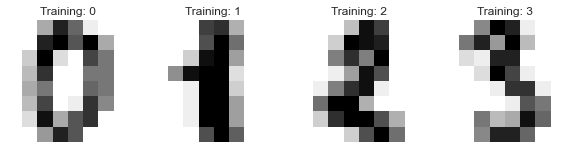

In [105]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' %label)

In [106]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

##### Model:

In [154]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [155]:
predicted[0:5]

array([8, 8, 4, 9, 0])

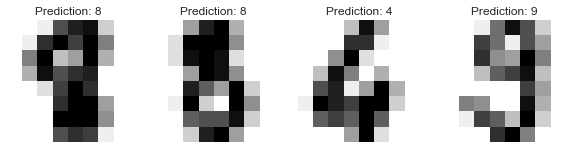

In [156]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

##### Evaluation:

In [232]:
# print(classification_report(y_test, predicted))

In [158]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,0.988636,0.994286,88.000000
1,0.988764,0.967033,0.977778,91.000000
2,0.988372,0.988372,0.988372,86.000000
3,0.975309,0.868132,0.918605,91.000000
4,0.988764,0.956522,0.972376,92.000000
5,0.946237,0.967033,0.956522,91.000000
6,0.989011,0.989011,0.989011,91.000000
7,0.956522,0.988764,0.972376,89.000000
8,0.936170,1.000000,0.967033,88.000000
9,0.927835,0.978261,0.952381,92.000000


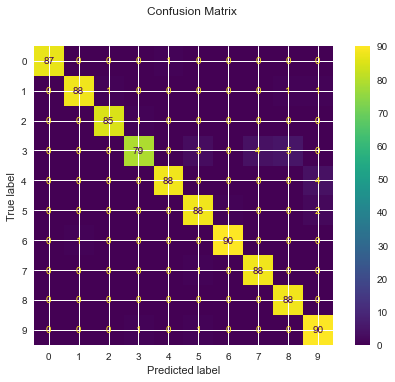

In [160]:
disp = plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(disp.confusion_matrix)

plt.show()

In [162]:
# help(disp)